# Flare 2021/05/26

In [1]:
import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

In [2]:
import os

# Specify the path to the folder you want to list files from
folder_path = "C:\\Users\Gebruiker\Documents\school\solar flares2\data2\\2021-05-26(2)\\nb_3950_2021-05-26T09_55_35_09_55_35=0-165_corrected_nup_export2022-07-08T17_28_40_im.fits"

maximum = 1000 # to be determined 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return folder_path
ttff = timeframe_to_filename_fits



<>:4: SyntaxWarning: invalid escape sequence '\G'
<>:4: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18916\3957371396.py:4: SyntaxWarning: invalid escape sequence '\G'
  folder_path = "C:\\Users\Gebruiker\Documents\school\solar flares2\data2\\2021-05-26(2)\\nb_3950_2021-05-26T09_55_35_09_55_35=0-165_corrected_nup_export2022-07-08T17_28_40_im.fits"


In [3]:
head0 = f.getheader(ttff(0))
maximum = head0['NAXIS5']
head0

 [astropy.io.fits.verify]


SIMPLE  =                    T / Written by IDL:  Tue Jun  1 13:08:46 2021      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 1985 / Number of positions along axis 1               
NAXIS2  =                 1999 / Number of positions along axis 2               
NAXIS3  =                   26 / Number of positions along axis 3               
NAXIS4  =                    1 / Number of positions along axis 4               
NAXIS5  =                  166 / Number of positions along axis 5               
EXTEND  =                    T / The file has extension(s).                     
OBS_HDU =                    1 /                                                
BUNIT   = 'W m^-2 Hz^-1 sr^-1' / Units in array                                 
BTYPE   = 'Intensity'          / Type of data in array                          
FILTER1 = '3950    '        

In [4]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for i, hdl in enumerate(io):
        print(f'\n next hdl number {i} : {hdl}')
        print(np.shape(hdl.data))
        print(hdl.data[0][0])
    tlist2 = io[4].data
    pos = io[1].data

# shape data: [(58, 1, 33, 2773, 2783)-data,  positons , array SIM_XY????, date and time frames,  
# (58, 1, 1, 2773, 2783)-data, terug date+time frames, nog eens date+time frames, en nog eens, array orde e10,  
# frame umbers , ....     errors?,  errors?]


wvl = pos[0][0][:,:,0,0,2][0]*10
np.save('line_data/wav_sstCaK.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000018C8BBEF890>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C8BBEE0F0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000018C8BBEE990>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C8BBEF4A0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C8BC40FE0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C8BC41730>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C8BC41E80>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C8BC425D0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C8BC43140>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C8BC43A70>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C8BC4C3E0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C8BC4CB30>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C8BC4D280>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000018C8BC4D9D0>, <astropy.io.fits.hdu.ta

In [5]:
pos[0][0][:,:,0,0,2][0]

array([393.18882402, 393.21876802, 393.24886402, 393.27880802,
       393.28884002, 393.29872002, 393.30875202, 393.31878402,
       393.32881602, 393.33884802, 393.34872802, 393.35876002,
       393.36879202, 393.37882402, 393.38885602, 393.39873602,
       393.40876802, 393.41880002, 393.42883202, 393.43886402,
       393.44874402, 393.45877602, 393.48872002, 393.51881602,
       393.54876002, 399.934776  ], dtype='>f8')

In [6]:
tlist = np.array(tlist2[0])
tlist3 = tlist[0,:,0,0,0, 0]
tlist3[2][17:], tlist3

('51.95929',
 array(['2021-05-26T09:55:37.52343', '2021-05-26T09:55:44.76030',
        '2021-05-26T09:55:51.95929', '2021-05-26T09:55:59.18347',
        '2021-05-26T09:56:06.45769', '2021-05-26T09:56:13.85686',
        '2021-05-26T09:56:21.13105', '2021-05-26T09:56:28.35538',
        '2021-05-26T09:56:35.57935', '2021-05-26T09:56:42.80356',
        '2021-05-26T09:56:50.04031', '2021-05-26T09:56:57.30200',
        '2021-05-26T09:57:04.70114', '2021-05-26T09:57:11.92516',
        '2021-05-26T09:57:19.13701', '2021-05-26T09:57:26.37361',
        '2021-05-26T09:57:33.63544', '2021-05-26T09:57:40.83458',
        '2021-05-26T09:57:48.09620', '2021-05-26T09:57:55.39538',
        '2021-05-26T09:58:02.61957', '2021-05-26T09:58:09.79378',
        '2021-05-26T09:58:17.01792', '2021-05-26T09:58:24.22961',
        '2021-05-26T09:58:31.51629', '2021-05-26T09:58:38.77807',
        '2021-05-26T09:58:46.05222', '2021-05-26T09:58:53.32638',
        '2021-05-26T09:59:00.60054', '2021-05-26T09:59:07.83712

In [7]:
time_list = [t[11:] for t in tlist3]
time_list

['09:55:37.52343',
 '09:55:44.76030',
 '09:55:51.95929',
 '09:55:59.18347',
 '09:56:06.45769',
 '09:56:13.85686',
 '09:56:21.13105',
 '09:56:28.35538',
 '09:56:35.57935',
 '09:56:42.80356',
 '09:56:50.04031',
 '09:56:57.30200',
 '09:57:04.70114',
 '09:57:11.92516',
 '09:57:19.13701',
 '09:57:26.37361',
 '09:57:33.63544',
 '09:57:40.83458',
 '09:57:48.09620',
 '09:57:55.39538',
 '09:58:02.61957',
 '09:58:09.79378',
 '09:58:17.01792',
 '09:58:24.22961',
 '09:58:31.51629',
 '09:58:38.77807',
 '09:58:46.05222',
 '09:58:53.32638',
 '09:59:00.60054',
 '09:59:07.83712',
 '09:59:15.08638',
 '09:59:22.32307',
 '09:59:29.49740',
 '09:59:36.88396',
 '09:59:44.12081',
 '09:59:51.33237',
 '09:59:58.55668',
 '10:00:05.83093',
 '10:00:13.12997',
 '10:00:20.32924',
 '10:00:27.59069',
 '10:00:34.81492',
 '10:00:42.07661',
 '10:00:49.30081',
 '10:00:56.53735',
 '10:01:03.82414',
 '10:01:11.28583',
 '10:01:18.47265',
 '10:01:25.69664',
 '10:01:32.95834',
 '10:01:40.20761',
 '10:01:47.41924',
 '10:01:54.6

In [8]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0] # TODO: werk hier verder
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [9]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

True (26, 1999, 1985)
the maximum attained value in frame 0 is nan and the 98 percile is nan


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

C:\Users\Gebruiker\Documents\school\solar flares2\data2\2021-05-26(2)\nb_3950_2021-05-26T09_55_35_09_55_35=0-165_corrected_nup_export2022-07-08T17_28_40_im.fits
s=(26, 1999, 1985)
the shape of the data is (166, '??', 26, 1999, 1985)
the wavelengths are self._wavel = array([3931.88824021, 3932.1876802 , 3932.4886402 , 3932.78808019,
       3932.88840019, 3932.98720019, 3933.08752019, 3933.18784019,
       3933.28816019, 3933.38848019, 3933.48728019, 3933.58760018,
       3933.68792018, 3933.78824018, 3933.88856018, 3933.98736018,
       3934.08768018, 3934.18800018, 3934.28832018, 3934.38864017,
       3934.48744017, 3934.58776017, 3934.88720017, 3935.18816016,
       3935.48760016, 3999.34776001])
Use arguments as dictionary with 'frames_of_overlap' to define a list of considerd frames to calculate overlap
calculated boundary at frame 0


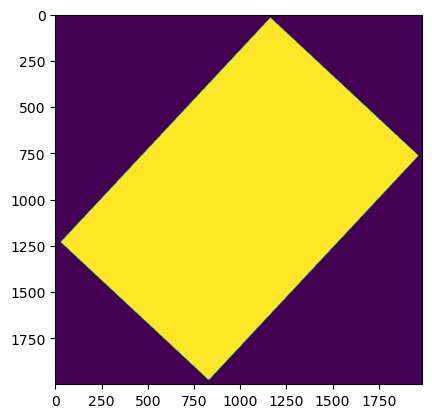

calculated boundary at frame 20


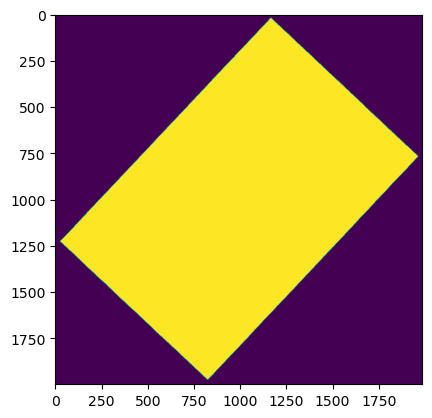

calculated boundary at frame 40


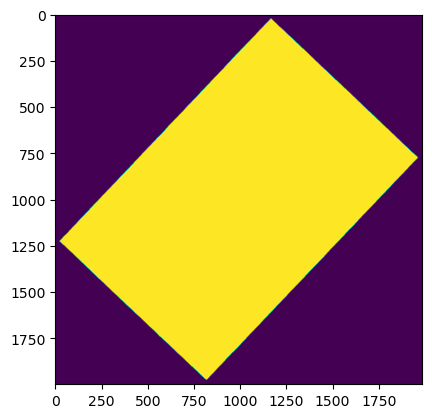

calculated boundary at frame 60


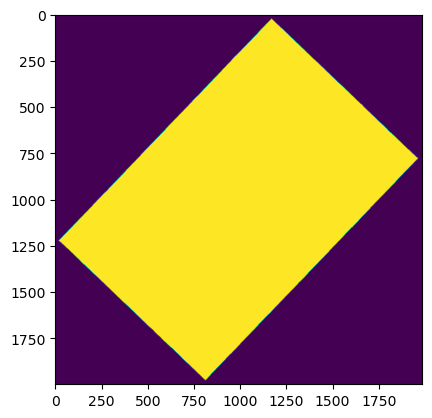

calculated boundary at frame 80


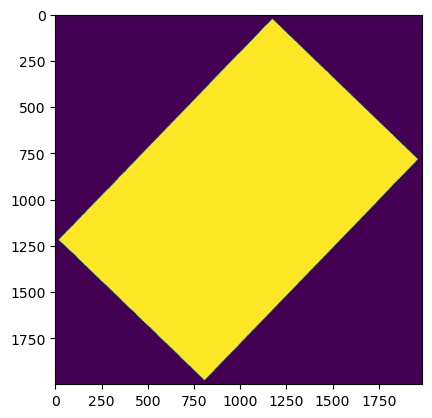

calculated boundary at frame 100


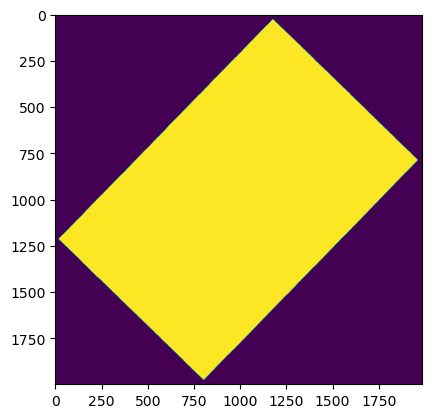

calculated boundary at frame 120


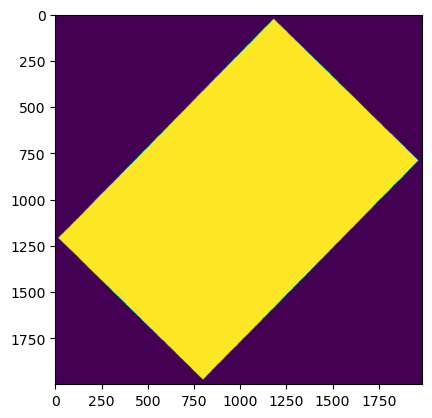

calculated boundary at frame 140


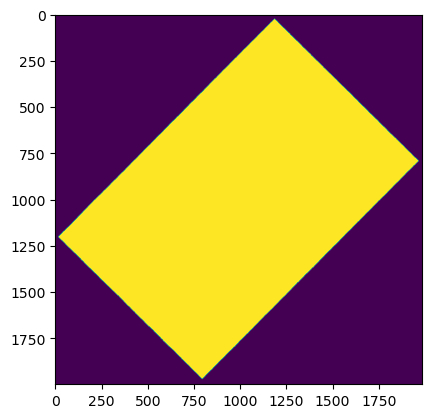

calculated boundary at frame 160


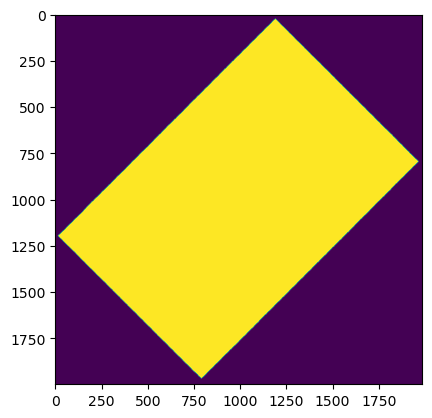

calculated boundary over folowing frames range(0, 166, 20)
Boundary
Blue=Outside, yellow=Inside


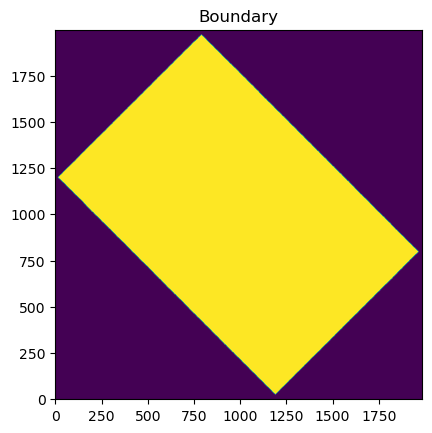

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
reload(un)

vertices = [(600, 60), (40, 823), (832, 1400), (1280, 770)]

CaK = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstCaK.npy', number_of_frames=maximum,
                 time=time_list, name_of_line='CaK21', thresh=[0, np.percentile(datacube(0), 99.5)],  boundary_methode='search_overlap', 
                 boundary_arguments = {"error":0.01}, with_stokes=True, with_time=True, alternative_datacube=datacube)

# CaK.datacube
# np.shape(CaK.datacube), CaK.datacube(0)[0:30:5,10:20:5, 100:200:30], 
CaK.boundary


In [12]:
# CaK.calculate__FOV_spect_over_time()

In [13]:
secs = un.get_TIME(CaK)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{CaK.shape=}')

the mean cadence is 7.284848484848474 seconds for this line!
CaK.shape=(166, '??', 26, 1999, 1985)


The guessed filters are [[3.833333333333333, 3.25], [12.5, 3.25], [21.166666666666668, 3.25]]


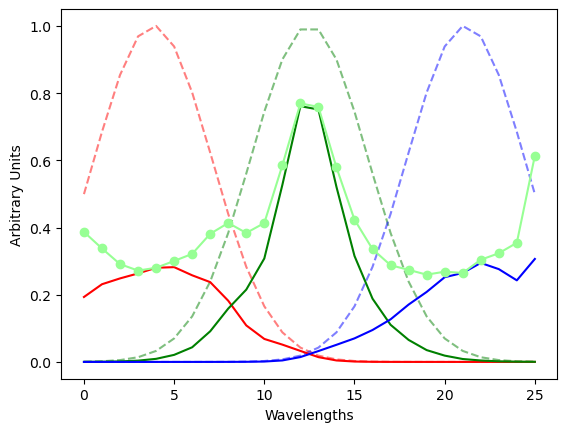

In [14]:
# %matplotlib inline
CaK.update_filters(None)# [[3,2], [7,2], [11,2]]
CaK.plot_filt(880,900)
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18916\3518095724.py:2: SyntaxWarning: invalid escape sequence '\s'
  theor_CaK = un.linestudier('E:\solar flares\data\\2017-09-06\line_data\\final_3950.npy', atlas=None, nr=101, neglect_atlas=True)


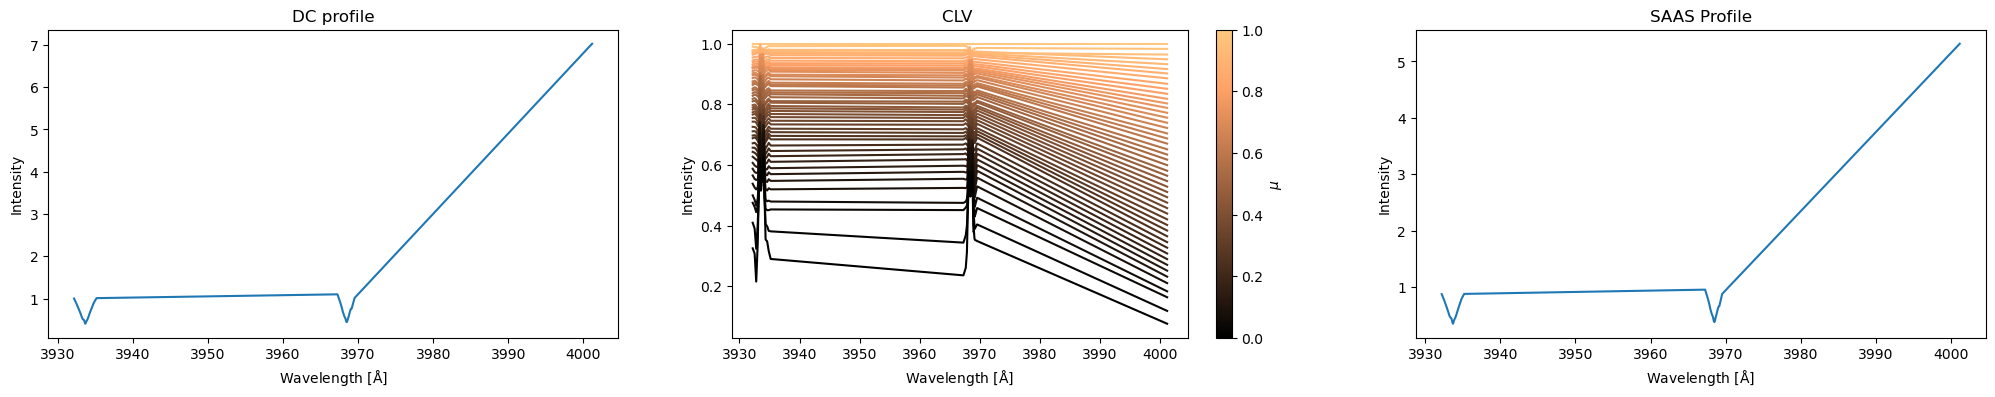

3935.025480025824 3951.030569782743


In [16]:
reload(un)
theor_CaK = un.linestudier('E:\solar flares\data\\2017-09-06\line_data\\final_3950.npy', atlas=None, nr=101, neglect_atlas=True)
print(np.median(theor_CaK.sst_wav), np.mean(theor_CaK.sst_wav))

## Calculating the $\mu$ !!!!! 


In [17]:
CaK.shape

(166, '??', 26, 1999, 1985)

In [18]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(CaK.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))
        try: 
            x= hdu.header['CRVAL1A']
            y = hdu.header['CRVAL2A']
            print("x =", x, "y=", y)
            pix_x= hdu.header['CRPIX1A']
            pix_y = hdu.header['CRPIX2A']
            print("middel pixel x =", pix_x, "middel pixel y =", pix_y)
        except KeyError:
            # raise(KeyError)
            pass

x= -598.761391414
y = -353.460135090 
pix_x=  1392.00 
pix_y = 1387.00 

SIMPLE  =                    T / Written by IDL:  Tue Jun  1 13:08:46 2021     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 1985 / Number of positions along axis 1              
 NAXIS2  =                 1999 / Number of positions along axis 2              
 NAXIS3  =                   26 / Number of positions along axis 3              
 NAXIS4  =                    1 / Number of positions along axis 4              
 NAXIS5  =                  166 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 OBS_HDU =                    1 /                                               
 BUNIT   = 'W m^-2 Hz^-1 sr^-1' / Units in array                                
 BTYPE   = 'Intensity'          / Type of data in array                         
 FILTER1 = '3950    '        

In [19]:
# WCSNAMEA= 'AVERAGED APPROXIMATE HPLN-TAN/HPLT-TAN CENTER POINT' /               
# CRPIX1A =              1392.00 / Center pixel of image array                    
# CRPIX2A =              1387.00 / Center pixel of image array                    
# CRVAL1A =       -598.761391414 / [arcsec] Coordinates of center of image array  
# CRVAL2A =       -353.460135090 / [arcsec] Coordinates of center of image array  
# CDELT1A =              0.00000 / Zero FOV extent                                
# CDELT2A =              0.00000 / Zero FOV extent                                
# SPECSYS = 'TOPOCENT'           / Coordinate reference frame = observer          

In [20]:
xy = pos[0][0][:,:,:,:, :2]
# seems to be centers per frame but different from those in the header???
fxp = np.array(xy[maximum//2,0,0,:,0])
fyp = np.array(xy[maximum//2,0,:,0,1])
fxp = np.concatenate((fxp, fyp))
np.shape(xy), xy[maximum//2,0], fxp, fyp

((166, 26, 2, 2, 2),
 array([[[657.12006997, 336.30796269],
         [732.31366997, 336.30796269]],
 
        [[657.12006997, 412.03216269],
         [732.31366997, 412.03216269]]], dtype='>f8'),
 array([657.12006997, 732.31366997, 336.30796269, 412.03216269]),
 array([336.30796269, 412.03216269], dtype='>f8'))

width = 129.48000000000002
[657.12006997 732.31366997 336.30796269 412.03216269]
does MU contain nan's? False


AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.5685602367778205 for timeframe 10
Coundourplot succesfully saved.


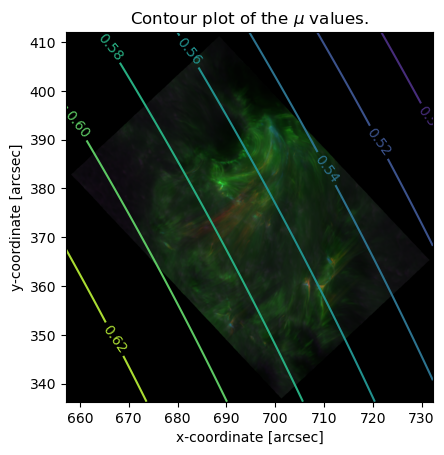

In [25]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

width = 0.13 * np.average(CaK.shape[-2:])/2
print(f"{width = }")

# or per pixel 0.13 arcsec

position = (x,y)


print(fxp)

x = np.linspace(fxp[0], fxp[1], CaK.shape[4])
y = np.linspace(fyp[0], fyp[1], CaK.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.ccp_frame(timeFrame, Show=False)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        B = over.boundary
        B = np.where(B == 1, 1, np.nan)
        K = MU * B
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=CaK, save=True, save_name=CaK.name_of_line, timeFrame=10)
sst_data = CaK
theor_line = theor_CaK
set_mu(CaK, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaK.index_mu], theor_line.sst_clv[theor_CaK.index_mu][0], clv_fit(mu, theor_line)


(200, 199) (200, 199) (199, 198)


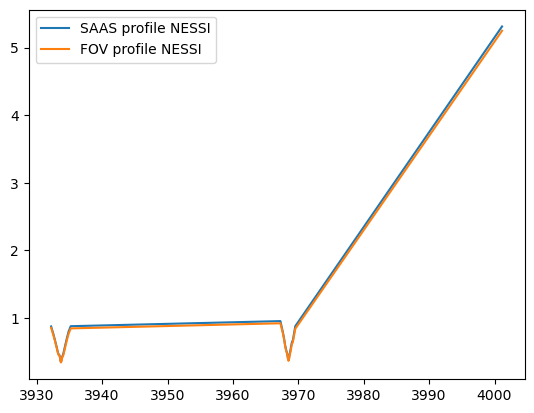

In [26]:
theor_CaK.set_fov( xx, yy, CaK.boundary, sr=959.63, reduction=10)



## Finding a suitable quiet sun patch

<>:41: SyntaxWarning: invalid escape sequence '\C'
<>:41: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_18916\2680251834.py:41: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_CaK.png')


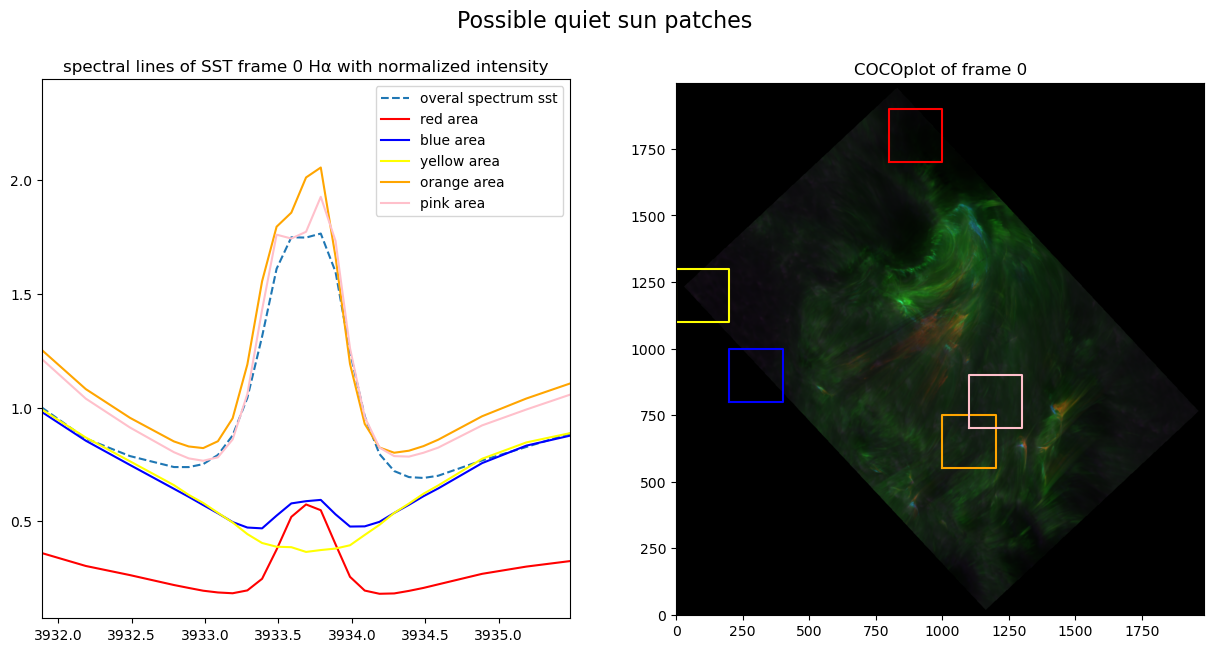

In [29]:
frame=0

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

CaK.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(800,1000),(1700,1900)], [(200,400), (800, 1000)], [(0, 200), (1100, 1300)], [(1000,1200),(550,750)], [(1100,1300),(700, 900)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
CaK.frame_integrated_spect(frame)
ax[0].plot(CaK._wavel, CaK.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_CaK.sst_wav + theta[0], theta[2] * theor_CaK.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]
ax[0].set_xlim((np.min(CaK._wavel), np.max(CaK._wavel[:-1])))



ax[1].imshow(CaK.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(CaK._wavel, CaK.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_CaK.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [30]:
color_wanted_patch = 'yellow'

the edges of the patch are denoted by the xlim: (0, 200) and ylim: (1100, 1300)


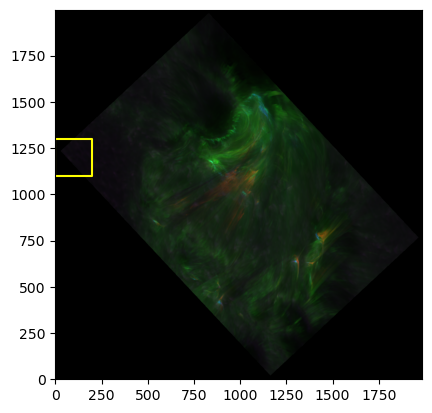

{'frame': 0, 'xlim': (0, 200), 'ylim': (1100, 1300), 'color': 'yellow'}

In [31]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaK.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
CaK.quiet_sun

The quiet sun is pick at x (660.8911199665911, 381.76901269240307) with average              mu 0.6061623463173845


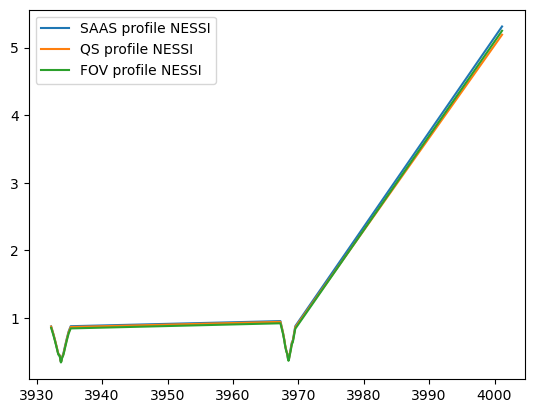

In [32]:
theor_CaK.set_quiet_sun(xlim=xlim, ylim=ylim)


the theta fit is  [0, 0, 0.3662695160348572]


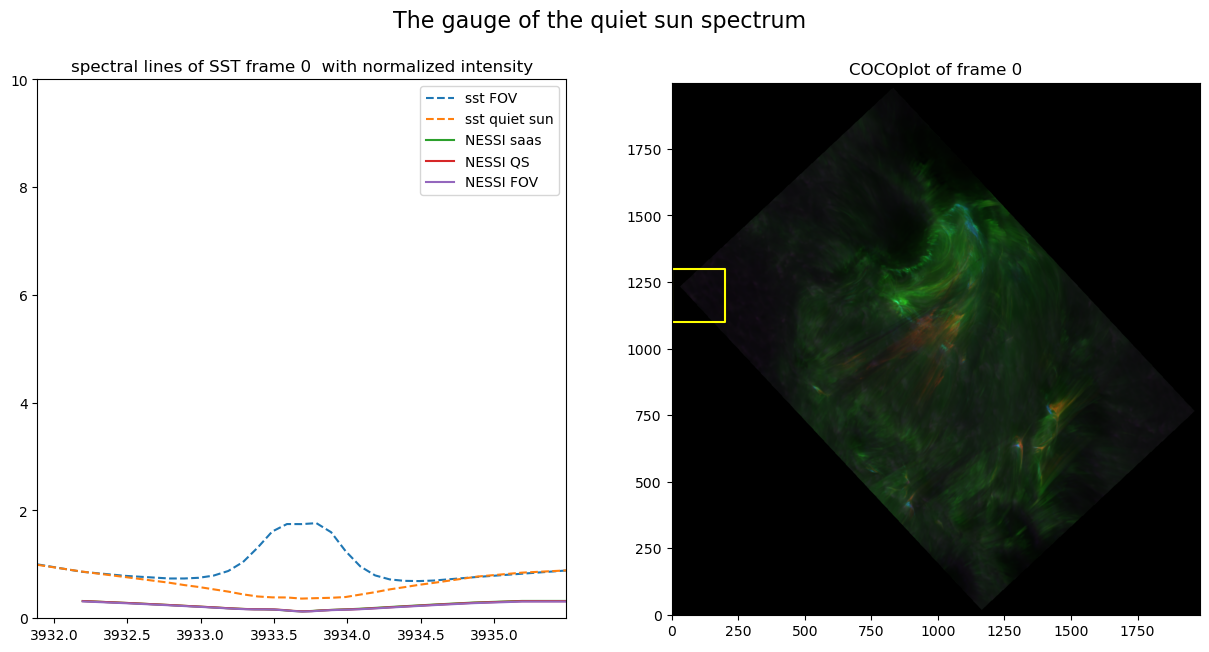

In [33]:
reload(un)
un.fit_qs_to_NESSI_cont_point(theor_CaK, CaK,  frame=0, xshift=0)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [34]:
sst_data = CaK
CaK.shape

(166, '??', 26, 1999, 1985)

In [35]:
CaK.calculate__FOV_spect_over_time()

In total 166 frames.
Now calculating frame:
165

In [36]:
sst_data.quiet_sun

{'frame': 0, 'xlim': (0, 200), 'ylim': (1100, 1300), 'color': 'yellow'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [14] at time ['t=09:57:19 UT'].
The SST data runs from t=09:55:37 UT to t=10:15:39 UT.


The areafactor for THIS flare is 0.0009002726357566106 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 72.35%.


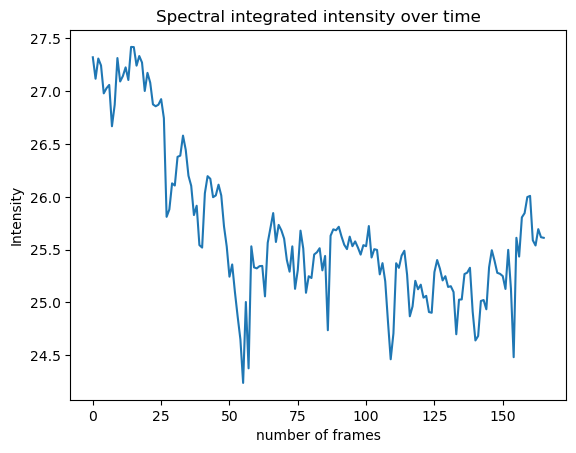

In [37]:
reload(un)
un.save_for_further_analysis(CaK, theor_CaK)


# Movie Making

[0, 0, 0.3662695160348572]
Intensity limit calculation for first time.
Intensity limit is saved.
frame: 0, 09:55:37.52343, total number of frames: 166 


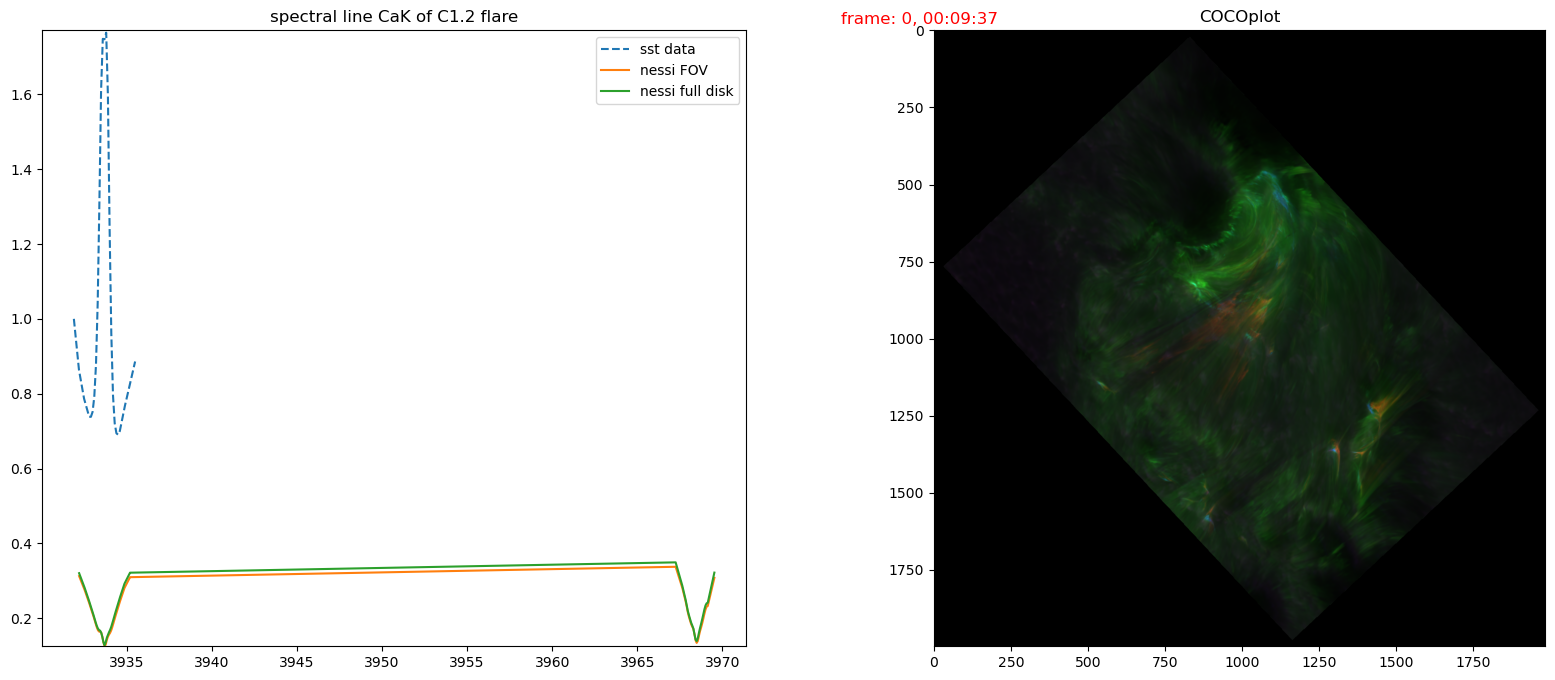

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 

In [38]:
# fill in here all arguments
theor_line = theor_CaK
sst_data = CaK
name_of_flare = "C1.2"
name_of_line = "CaK"
step=True
show_boundary=False

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step, show_boundary)